In [2]:
%load_ext autoreload
%autoreload 2
from utils import *
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [3]:
f = open("communities/partition", "rb")
partition = pickle.load(f)
f.close()

In [4]:
values = list(partition.values())

In [5]:
c = Counter(values)
groups_sorted = sorted(np.unique(values), key=c.get, reverse=True)

In [6]:
groups_counts = []
for group_id in groups_sorted:
    groups_counts.append((group_id, c[group_id]))
groups_counts = np.array(groups_counts)

In [7]:
groups_counts

array([[  3, 707],
       [  7, 647],
       [  2, 545],
       ...,
       [698,   1],
       [699,   1],
       [700,   1]])

In [8]:
groups_filtered = groups_counts[:3]

In [9]:
groups_filtered[:,0]

array([3, 7, 2])

In [10]:
f = open("communities/nb_tweets_per_user", "rb")
nb_tweets_per_user = pickle.load(f)
f.close()

In [11]:
f = open("communities/graph_10000", "rb")
G = pickle.load(f)
f.close()

In [12]:
partition_filtered = dict()
G_filtered = G.copy()
nb_tweets_per_user_filtered = dict()
for user_id, group in partition.items():
    if group in groups_filtered[:,0]:
        partition_filtered[user_id] = group
        nb_tweets_per_user_filtered[user_id] = nb_tweets_per_user[user_id]
    else:
        G_filtered.remove_node(user_id)

In [13]:
pos = community_layout(G_filtered, partition_filtered)

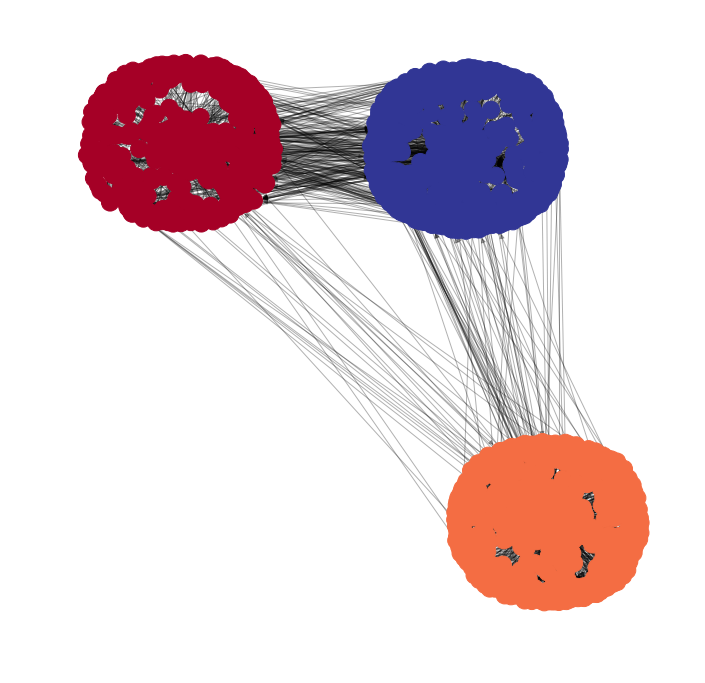

In [20]:
plt.figure(figsize=(12, 12))
'''nx.draw_networkx_nodes(G_filtered, pos, node_size=list(nb_tweets_per_user_filtered.values()),\
                       cmap=plt.cm.RdYlBu, node_color=list(partition_filtered.values()))
'''
nx.draw_networkx_nodes(G_filtered, pos,\
                       cmap=plt.cm.RdYlBu, node_color=[partition_filtered.get(node) for node in G_filtered.nodes()])
nx.draw_networkx_edges(G_filtered, pos, alpha=0.3)
plt.axis('off')
plt.show(G_filtered)

In [49]:
partition_list = [(user_id, group) for (user_id,group) in partition.items()]
partition_array = np.array(partition_list)

In [68]:
partition_array

array([[806809452863029248,                  4],
       [795961766421364737,                  1],
       [850437495296753666,                  8],
       ...,
       [        1220853756,                  7],
       [776612367966756864,                  2],
       [846082391970119681,                  7]])

In [75]:
top_groups_partition = partition_array[np.where(np.in1d(partition_array[:,1], groups_filtered[:,0]))]

In [73]:
first_group = groups_filtered[:,0][0]
first_group

3

In [76]:
first_group_partition = top_groups_partition[np.where(top_groups_partition[:,1] == first_group)]

In [80]:
first_group_users = tuple(first_group_partition[:,0])

In [ ]:
twitter_db = connect_to_db()
cursor = twitter_db.cursor()

query = ("SELECT text \
        FROM tweets\
        WHERE lang='fr' AND \
        user_id IN " + str(first_group_users) + " OR \
        in_reply_to_user_id IN " + str(first_group_users) + " OR \
        quoted_user_id IN " + str(first_group_users) + " OR \
        retweeted_user_id IN " + str(first_group_users)) + " LIMIT 10000"

cursor.execute(query)

In [82]:
first_group_tweets = []
for tweet in cursor:
    first_group_tweets.append(tweet)
cursor.close()

True

In [88]:
first_group_tweets[:20]

[("En voyant ce rond rouge et bleu, j'ai cru un moment que c'était la gestion de l'espace de stockage d'… https://t.co/8919jcCrJX",),
 ('RT @Silvio_Gesell_: Le commentaire politique bien psychologisant. https://t.co/sbarL1joyg',),
 ('Grèce: les Etats-Unis "ouverts" à une participation financière du FMI https://t.co/222KWD8Qo4',),
 ('RT @AnaisCondomines: #Melenchon et l\'intox du "dictateur gauchiste corrompu" : histoire d\'un raccourci bien pratique… ',),
 ('si vous vous lancez dans le décryptage de tous les hoax qui circulent vous allez avoir du boulot #soutine https://t.co/Rb2gTgeTDQ',),
 ('RT @DamienDole: A ceux qui regardent les sondages pour dire "je vais voter Macron pour faire barrage à Le Pen". Regardez le score d… ',),
 ("RT @marcendeweld: L'analyse des programmes des candidats par Oxfam, Secours Catholique, CCFD https://t.co/TLszo9FmC6 Mélenchon &amp; Hamon en h…",),
 ('RT @d_schneidermann: Sur "l\'Alliance bolivarienne" de Mélenchon, ce que Cohen et Aphatie n\'ont pas compri

## TO DO :
- importer un vectorizer
- transformer les tweets en vecteurs
- faire la distance des tweets intra-communauté et inter-communauté